In [1]:
import numpy as np
import scanpy as sc
import scipy
from scipy.sparse import csr_matrix
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
from composition_stats import clr
import anndata as ad
from muon import prot as pt

rna_prot = [sc.read_h5ad("h5ads/correct_rna.h5ad"),  
            sc.read_h5ad("h5ads/correct_protein.h5ad")]

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDepr

In [38]:
rna_prot[0]

AnnData object with n_obs × n_vars = 47024 × 28608
    obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_

In [2]:
thaw_set = list(set(rna_prot[0].obs.Thaw.values))

In [41]:
donor_ls = ["Z", "M", "U"]
thaw_ls = [['Z-A3-Unsti', 'Z-A3-9th', 'Z-A3-1st', 'Z-A3-5th'], 
           ['M-A3-Unsti', 'M-A3-6th', 'M-A3-9th', 'M-A3-3rd'], 
           ['U-A3-Unsti', 'U-A3-4th', 'U-A3-7th', 'U-A3-10th']]

sep_donors = [[], [], []]


for i in range(len(rna_prot)):
    for j in range(len(donor_ls)):#.Categories
        # because of this subset, we lose nearest neighbors
        subset_data = rna_prot[i][rna_prot[i].obs.Thaw.isin(thaw_ls[j])]
        sc.pp.neighbors(subset_data)
        sep_donors[j].append((subset_data))
    #print(thaw_type)

In [42]:
len(sep_donors[0])

2

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


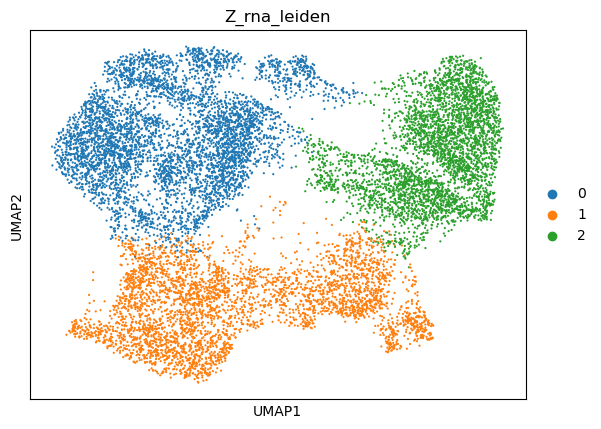

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


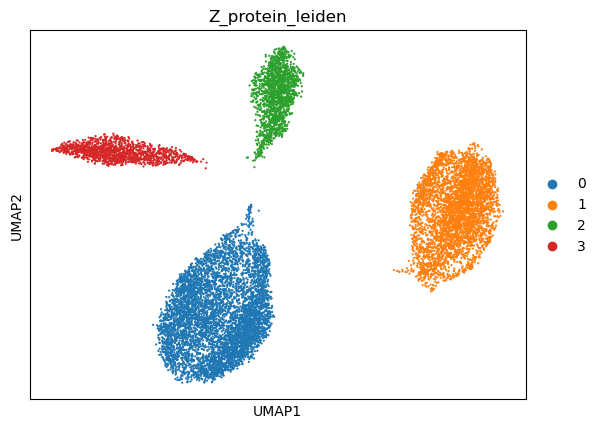

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


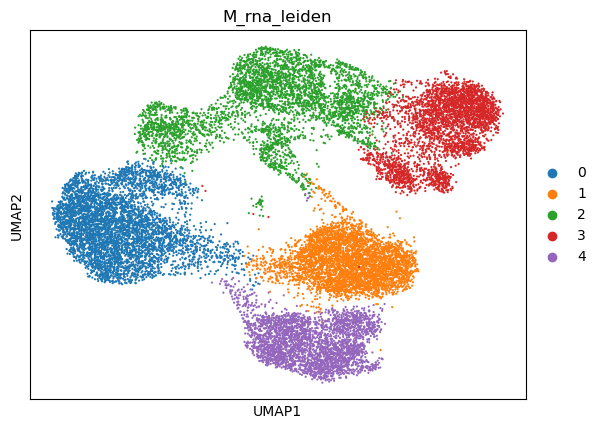

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


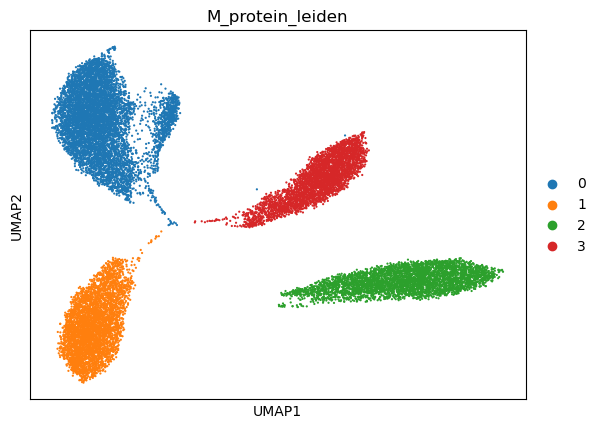

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


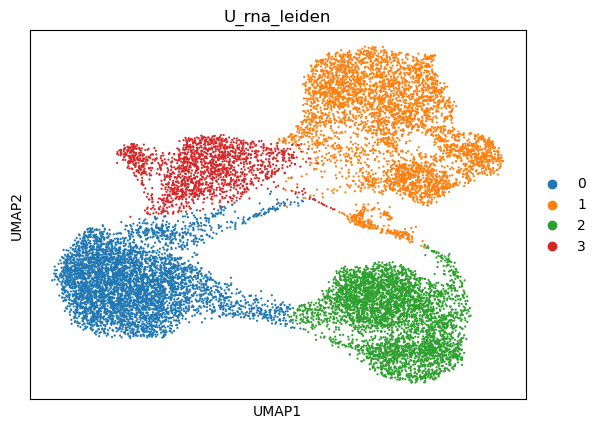

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


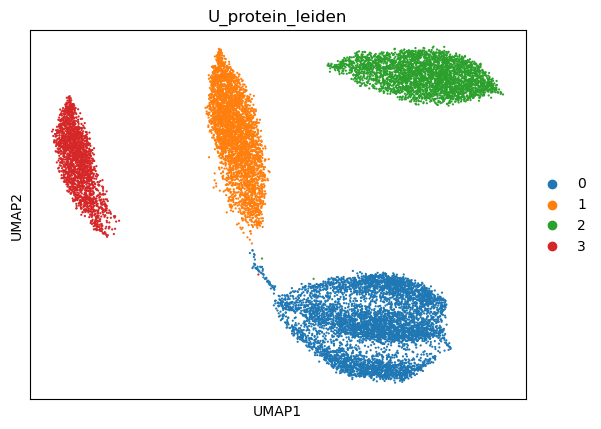

In [43]:
# make a umap for each donor 
#thaws[1]
names = ["rna", "protein"]
for i in range(len(sep_donors)):
    for j in range(len(names)):
        sc.pp.neighbors(sep_donors[i][j])
        sc.tl.umap(sep_donors[i][j])
        sc.tl.leiden(sep_donors[i][j], key_added=donor_ls[i] +"_"+names[j]+"_leiden", resolution=0.1)
        sc.pl.umap(sep_donors[i][j], color=donor_ls[i] +"_"+names[j]+"_leiden", size=10)

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses

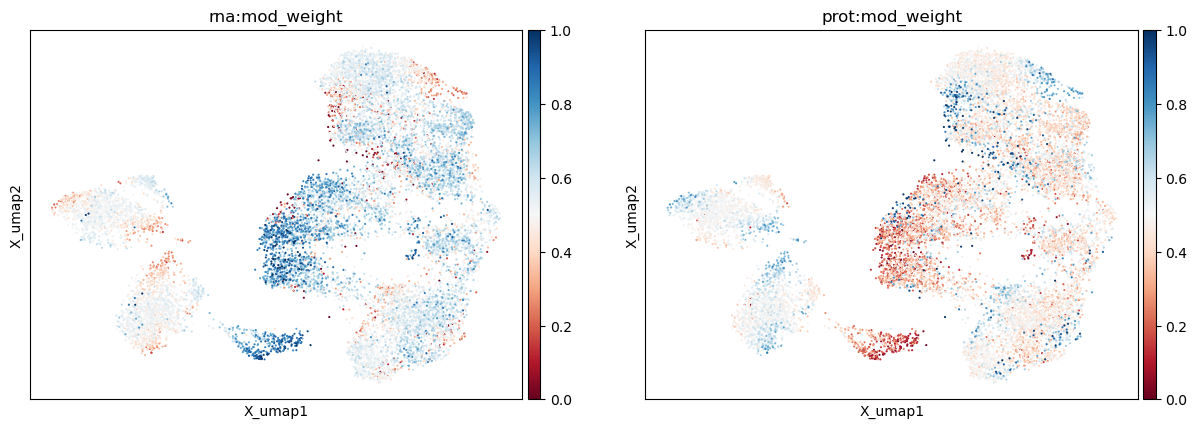

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


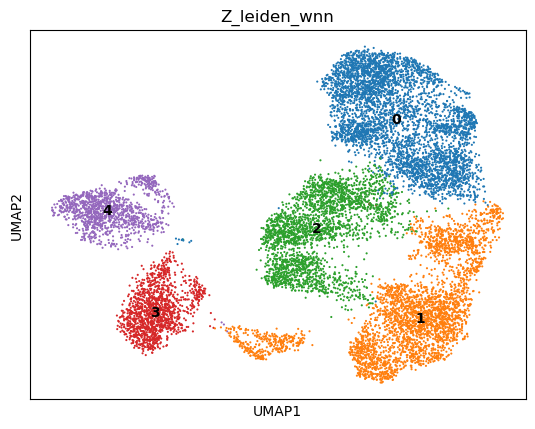

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses

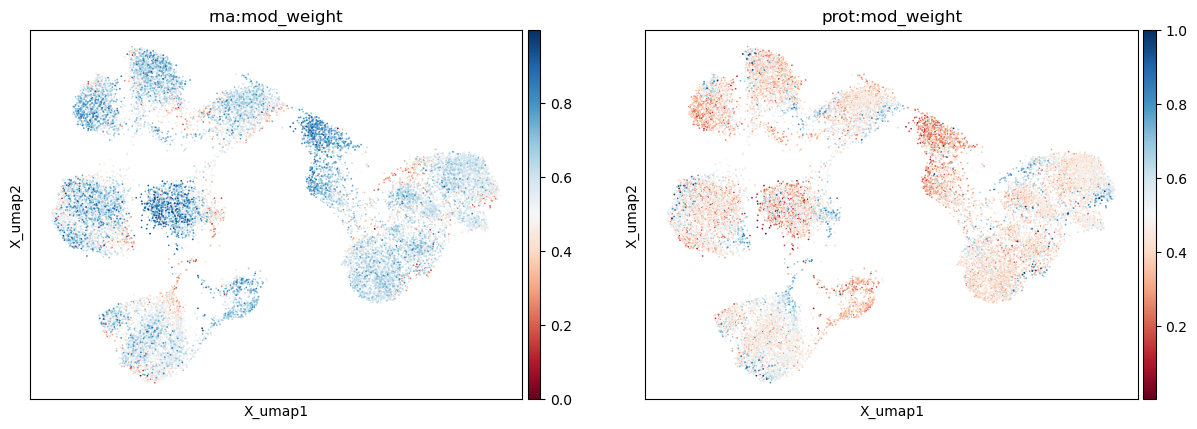

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


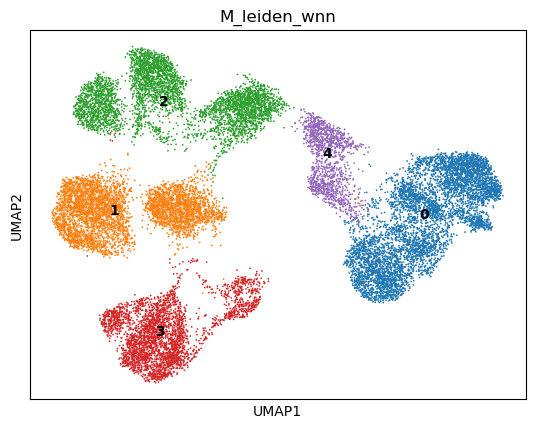

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses

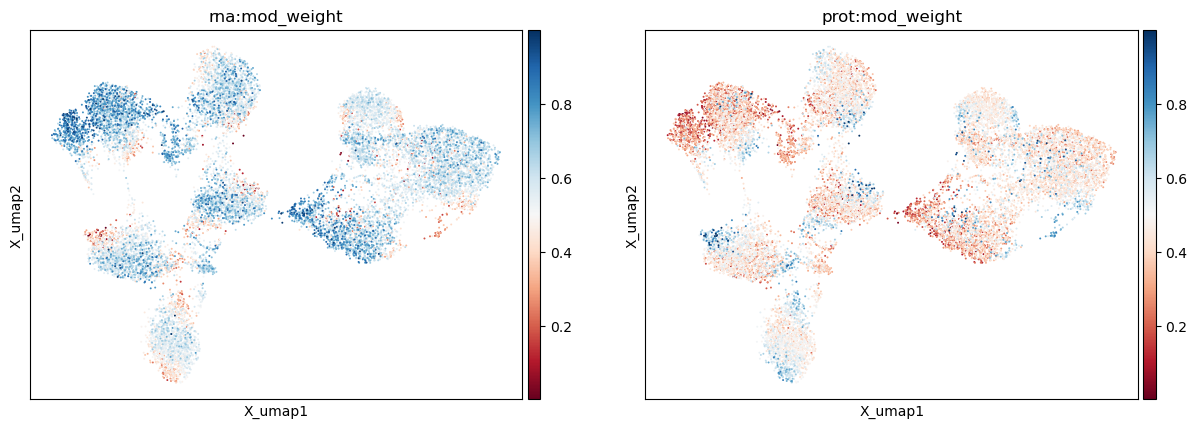

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


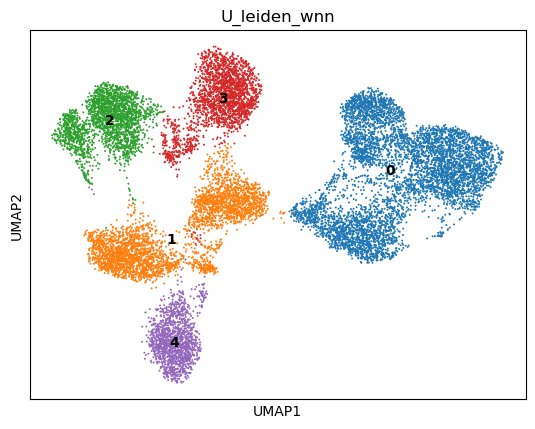

In [47]:
import muon as mu

mdata_arr = []
leiden_names = []

for j in range(len(sep_donors)):
    mdata = mu.MuData({'rna': sep_donors[j][0], 'prot': sep_donors[j][1]})
    # Calculate weighted nearest neighbors
    mu.pp.neighbors(mdata, key_added='wnn')
    mu.tl.umap(mdata, neighbors_key='wnn', random_state=10)
    mu.pl.umap(mdata, color=['rna:mod_weight', 'prot:mod_weight'], cmap='RdBu')
    # actual joint clustering
    sc.tl.leiden(mdata, resolution=0.1, neighbors_key='wnn', key_added=donor_ls[j]+'_leiden_wnn') # 0.1 makes fewer clusters
    sc.pl.umap(mdata, color=donor_ls[j] +'_leiden_wnn', legend_loc='on data')
    mdata_arr.append(mdata)
    leiden_names.append(donor_ls[j] +'_leiden_wnn')

In [36]:
mdata_arr

[MuData object with n_obs × n_vars = 19203 × 28757
   obs:	'M_leiden_wnn'
   var:	'gene_ids', 'feature_types', 'n_counts'
   uns:	'wnn', 'umap', 'leiden', 'M_leiden_wnn_colors'
   obsm:	'X_umap'
   obsp:	'wnn_distances', 'wnn_connectivities'
   2 modalities
     rna:	19203 x 28608
       obs:	'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypo

/tmp/ipykernel_895357/3942411170.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  prot.obs[leiden_names[i]] = labels


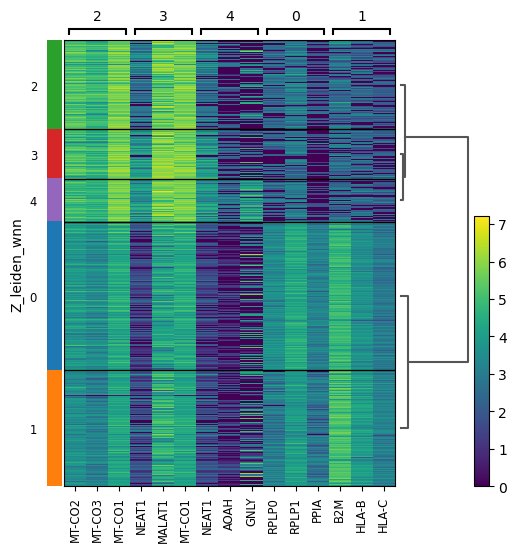

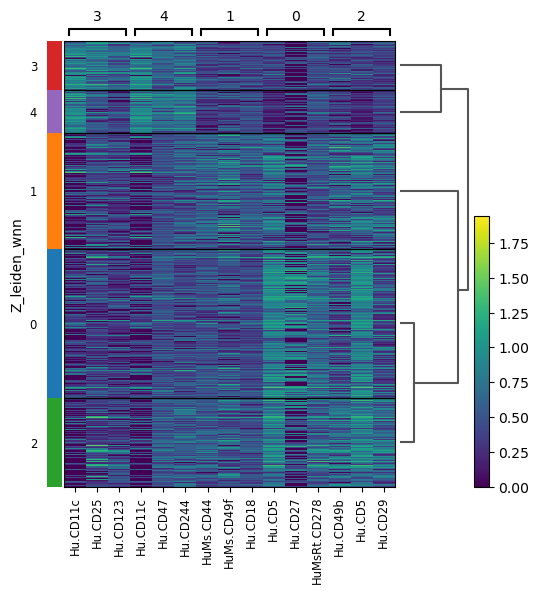

/tmp/ipykernel_895357/3942411170.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  prot.obs[leiden_names[i]] = labels


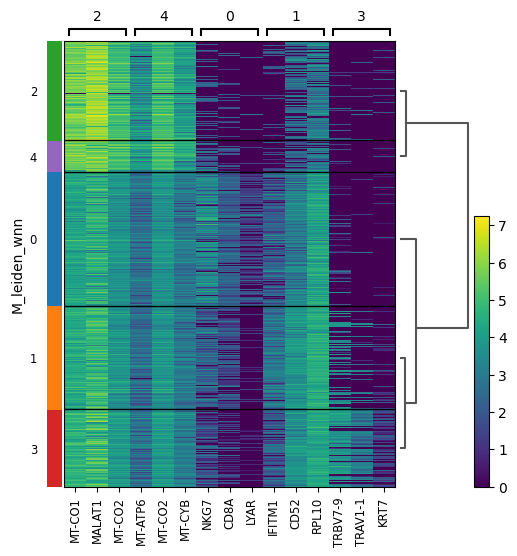

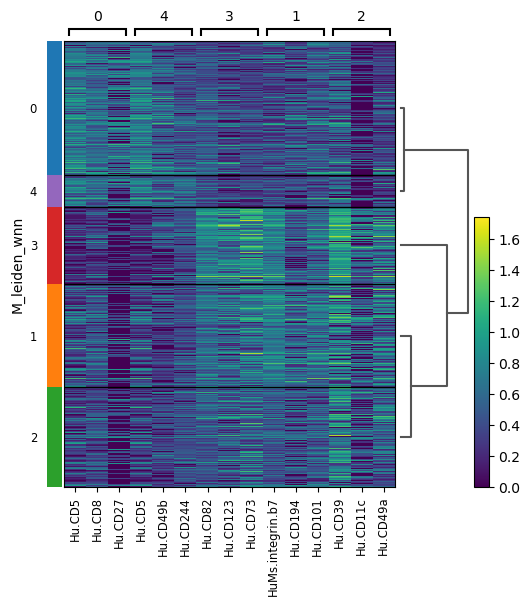

/tmp/ipykernel_895357/3942411170.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  prot.obs[leiden_names[i]] = labels


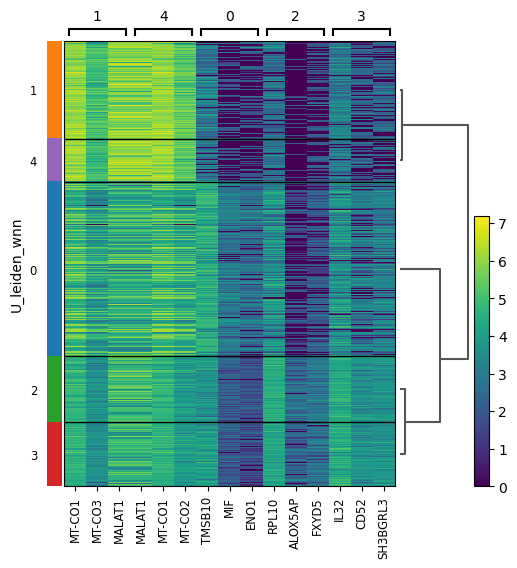

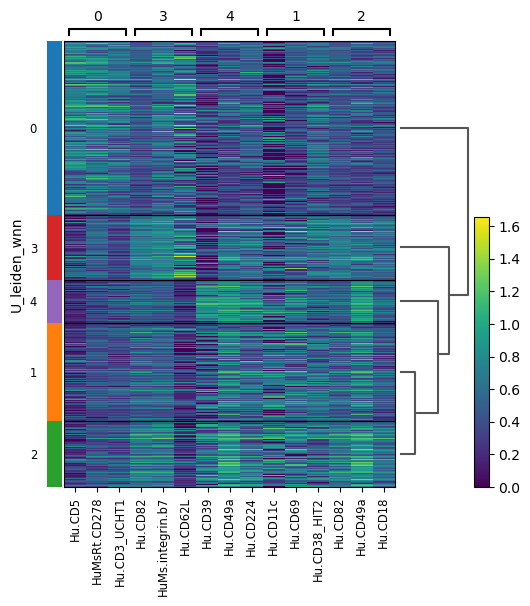

In [48]:
# actual ranking stuff

for i in range(len(mdata_arr)):
    # for j in range(len(thaw_set)):
    mdata = mdata_arr[i]
    labels = mdata.obs[leiden_names[i]]#["leiden_wnn"] # here are the labels
    rna = mdata["rna"] # normalized RNA counts
    #print(mdata["rna"])
    prot = mdata["prot"]
    # where did the log1ps go?
    rna.uns['log1p']["base"] = None#.log1p
    prot.uns['log1p']["base"] = None
    prot = prot[:, prot.var_names[:-12]]
    rna.obs[leiden_names[i]] = labels
    prot.obs[leiden_names[i]] = labels
    sc.tl.rank_genes_groups(rna, leiden_names[i], method='wilcoxon', key_added = "wilcoxon") # wilcoxon rank sum, 'benjamini-hochberg' correction
    # get top 3 genes
    sc.pl.rank_genes_groups_heatmap(rna, n_genes=3, key="wilcoxon", groupby=leiden_names[i], show_gene_labels=True)
    # get top 3 prots
    sc.tl.rank_genes_groups(prot, leiden_names[i], method='wilcoxon', key_added = "wilcoxon")
    sc.pl.rank_genes_groups_heatmap(prot, n_genes=3, key="wilcoxon", groupby=leiden_names[i], show_gene_labels=True)
    